In [3]:
import pandas as pd


# Carga de datos

In [4]:
# Encuesta Nacional de Ocupación y Empleo
casa_enoe="C:conjunto_de_datos_enoen_2022_1t_csv/conjunto_de_datos_coe2_enoen_2022_1t/conjunto_de_datos/conjunto_de_datos_coe2_enoen_2022_1t.csv"
enoe_brutos=pd.read_csv(casa_enoe)
# filtramos las columnas que queremos tener:
# columnas=["ent","v_sel", "p6b1","p6b2","p6c","p7g1","p7g2","p7g3","p7g9","p7gcan"]
# enoe_brutos.head()
columnas=["ent","v_sel", "p6b1","p6b2","p6c","p7g1","p7g2","p7g3","p7g9","p7gcan"]
enoe_filtrado=enoe_brutos[columnas]
enoe_filtrado
# enoe_filtrado["p6b1"].hist()
# enoe_filtrado[enoe_filtrado["p6b1"]==" "].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12, figsize=(8, 6), color='skyblue')
# enoe_filtrado["p6b2"][enoe_filtrado["p6b1"]=="5"]

# https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/doc/c_amp_v6a.pdf
# https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/doc/enoe_nota_tecnica_0123.pdf

,ent,v_sel,p6b1,p6b2,p6c,p7g1,p7g2,p7g3,p7g9,p7gcan
0,9,1,2,16000,,,,,,
1,9,4,7,,9,,,,,
2,9,4,8,,8,,,,,
3,9,4,7,,9,,,,,
4,9,2,8,,3,,,,,
...,...,...,...,...,...,...,...,...,...,...
326384,32,18,,,,,,,,
326385,32,19,,,,,,,,
326386,32,19,3,6450,,,,,,
326387,32,19,1,5300,,,,,,


# Aplicación de reglas


In [ ]:
# p6b1 tiene los siguientes valores:
# 1 si recibe cada mes -> 1
# 2 si recibe cada 15 días -> 2
# 3 si recibe cada semana -> 4
# 4 si recibe diario -> 30
# 5 otro período de pago -> 3
# 6 le pagan por pieza -> depende del valor de la pieza, si la pieza
# 7 no supo estimar -> 1
# 8 se negó a contestar -> 1
# "" no aplica -> 1

# -----------------------------------------------------------------------------
# p6b2: Pregunta 6b Cantidad en  pesos
def regla_p6b2(valor):
    if valor==' ':
        return 0
    else:
        return float(valor)

# -----------------------------------------------------------------------------
# p6b1: Pregunta 6b ¿Cada cuándo obtiene ... sus ingresos o le pagan?
def regla_p6b1(fila):
    if fila['p6b1']=='1':
        return 1
    elif fila['p6b1']=='2':
        return 2
    elif fila['p6b1']=='3':
        return 4
    elif fila['p6b1']=='4':
        return 30
    elif fila['p6b1']=='5':
        return 3
    # si le pagan por pieza pero no da el valor de la pieza entonces damos 1
    elif fila['p6b1']=='6' and fila['p6b2']==' ':
        return 1
    # si le pagan por pieza y la pieza vale más de 10mil pesos entonces 1
    elif fila['p6b1']=='6' and float(fila['p6b2'])>=10000:
        return 1
    # si le pagan por pieza y la pieza vale más de 10mil pesos entonces vende 3
    elif fila['p6b1']=='6' and float(fila['p6b2'])<10000:
        return 3    
    elif fila['p6b1']=='7':
        return 1
    elif fila['p6b1']=='8':
        return 1
    else:
        return 1

# -----------------------------------------------------------------------------    
# p6c: Pregunta 6c Actualmente el salario mínimo mensual es de $ , ¿la cantidad que ... Obtiene al mes por su trabajo es
# 1 menor?
# 2 igual a esta cantidad?
# 3 más de 1 salario mínimo hasta 2?
# 4 más de 2 salarios mínimos hasta 3?
# 5 más de 3 salarios mínimos hasta 5?
# 6 más de 5 salarios mínimos hasta 10?
# 7 más de 10 salarios mínimos?
# 8 No quiso dar información
# 9 NS
# Según la información que encontré en internet, el salario mínimo en México tendrá un aumento nominal de 22% en 2022, 
# informó la Comisión Nacional de los Salarios Mínimos (Conasami)12. Esto implica que el salario pasará de 141.70 a 172.87 pesos diarios 
# en gran parte del país. En la Zona Libre de la Frontera Norte, el monto pasará de 213.39 a 260.34 pesos diarios en 202213. 
# Los salarios mínimos profesionales también recibirán un incremento de 22%
def regla_p6c(fila):
    if fila['p6c']=='1':
        return 141.7*30
    if fila['p6c']=='2':
        return 172.87*30
    if fila['p6c']=='3':
        return 172.87*30*1.5
    if fila['p6c']=='4':
        return 172.87*30*2.5
    if fila['p6c']=='5':
        return 172.87*30*4
    if fila['p6c']=='6':
        return 172.87*30*8
    if fila['p6c']=='7':
        return 172.87*30*10
    if fila['p6c']=='8':
        return 0
    else:
        return 0


# -----------------------------------------------------------------------------
# p7gcan:  Aproximadamente ¿cuánto gana ... al mes en su segundo trabajo? Pregunta 7g Cantidad en  pesos
def regla_p7g1(fila):
    if fila['p7gcan']==' ':
        return 0
    else:
        return float(fila['p7gcan'])

    

# periodicidades convertidas a meses en las que gana dinero
aux_p6b1=enoe_filtrado.apply(regla_p6b1, axis=1)
# cuánto gana en pesos dependiendo de la periodicidad
aux_p6b2=enoe_filtrado['p6b2'].apply(regla_p6b2)
# cuántos salarios mínimos gana
aux_p6c=enoe_filtrado.apply(regla_p6c, axis=1)
# cu+anto gana al mes en el 2do trabajo
aux_p7g1=enoe_filtrado.apply(regla_p7g1, axis=1)

# agregamos las listas al dataframe
multi=aux_p6b1*aux_p6b2
enoe_filtrado.loc[:, 'salario_mes']=multi
enoe_filtrado.loc[:, 'salario_minimo']=aux_p6c
enoe_filtrado.loc[:, 'segundo_salario']=aux_p7g1
# enoe_filtrado


# hay veces en las que el campo salario_mes no está poblado, el salario mínimo sí y al revés
def regla_salario(fila):
    # si no tenemos el salario del mes, pero tenemos el minimo -> seleccionamos MINIMO
    if fila['salario_mes']==0 and fila['salario_minimo']!=0:
        return fila['salario_minimo']
    # si no tenemos el salario minimo, pero tenemos el del mes -> seleccionamos MES
    if fila['salario_minimo']==0 and fila['salario_mes']!=0:
        return fila['salario_mes']
    else:
        return max(fila['salario_mes'],fila['salario_minimo'])
    
salarios=enoe_filtrado.apply(regla_salario, axis=1)
enoe_filtrado.loc[:, 'salario_mes_min']=salarios

salario_total=enoe_filtrado['salario_mes_min']+enoe_filtrado['segundo_salario']
enoe_filtrado.loc[:, 'salario_total']=salario_total
enoe_filtrado

## Nombre de las entidades

In [6]:
enoe_filtrado['ent'].unique()

array([ 9, 15, 14, 19, 21, 11,  5, 10, 24, 31,  8, 28, 30, 12,  1, 16, 27,
        7,  2, 25, 26, 18,  4, 17, 20, 32,  6, 22, 29,  3, 23, 13],
      dtype=int64)

In [7]:
entidades=pd.read_csv("C:conjunto_de_datos_enoen_2022_1t_csv/conjunto_de_datos_coe2_enoen_2022_1t/catalogos/ent.csv", encoding='latin1')
entidades

,CVE,DESCRIP
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila
5,6,Colima
6,7,Chiapas
7,8,Chihuahua
8,9,Ciudad de México
9,10,Durango


In [8]:
enoe_filtrado_ent=pd.merge(enoe_filtrado, entidades, how='left', left_on='ent', right_on='CVE')
enoe_filtrado_ent
# 326389

,ent,v_sel,p6b1,p6b2,p6c,p7g1,p7g2,p7g3,p7g9,p7gcan,salario_mes,salario_minimo,segundo_salario,salario_mes_min,salario_total,CVE,DESCRIP
0,9,1,2,16000,,,,,,,32000.0,0.00,0.0,32000.00,32000.00,9,Ciudad de México
1,9,4,7,,9,,,,,,0.0,0.00,0.0,0.00,0.00,9,Ciudad de México
2,9,4,8,,8,,,,,,0.0,0.00,0.0,0.00,0.00,9,Ciudad de México
3,9,4,7,,9,,,,,,0.0,0.00,0.0,0.00,0.00,9,Ciudad de México
4,9,2,8,,3,,,,,,0.0,7779.15,0.0,7779.15,7779.15,9,Ciudad de México
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326384,32,18,,,,,,,,,0.0,0.00,0.0,0.00,0.00,32,Zacatecas
326385,32,19,,,,,,,,,0.0,0.00,0.0,0.00,0.00,32,Zacatecas
326386,32,19,3,6450,,,,,,,25800.0,0.00,0.0,25800.00,25800.00,32,Zacatecas
326387,32,19,1,5300,,,,,,,5300.0,0.00,0.0,5300.00,5300.00,32,Zacatecas


In [9]:
enoe_final=enoe_filtrado_ent[enoe_filtrado_ent["salario_total"]>0].reset_index(drop=True)
enoe_final

,ent,v_sel,p6b1,p6b2,p6c,p7g1,p7g2,p7g3,p7g9,p7gcan,salario_mes,salario_minimo,segundo_salario,salario_mes_min,salario_total,CVE,DESCRIP
0,9,1,2,16000,,,,,,,32000.0,0.00,0.0,32000.00,32000.00,9,Ciudad de México
1,9,2,8,,3,,,,,,0.0,7779.15,0.0,7779.15,7779.15,9,Ciudad de México
2,9,2,7,,3,,,,,,0.0,7779.15,0.0,7779.15,7779.15,9,Ciudad de México
3,9,2,7,,3,,,,,,0.0,7779.15,0.0,7779.15,7779.15,9,Ciudad de México
4,9,2,8,,3,,,,,,0.0,7779.15,0.0,7779.15,7779.15,9,Ciudad de México
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146304,32,17,3,6450,,,,,,,25800.0,0.00,0.0,25800.00,25800.00,32,Zacatecas
146305,32,17,3,2580,,,,,,,10320.0,0.00,0.0,10320.00,10320.00,32,Zacatecas
146306,32,18,2,5000,,,,,,,10000.0,0.00,0.0,10000.00,10000.00,32,Zacatecas
146307,32,19,3,6450,,,,,,,25800.0,0.00,0.0,25800.00,25800.00,32,Zacatecas


<Axes: >

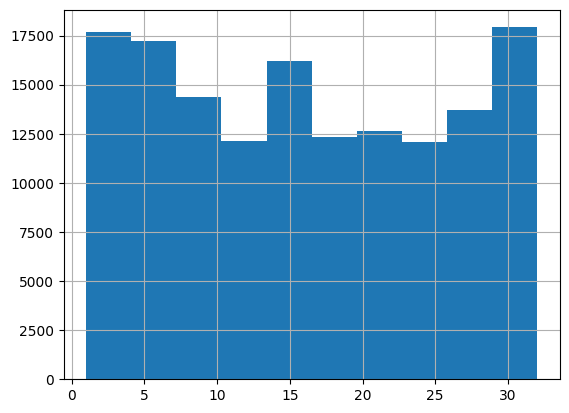

In [10]:
enoe_final["ent"].hist()

In [11]:
enoe_final.to_csv("enoe_final.csv", encoding='latin-1')